## 以下のリンクを参考にPyMc3をお試し
## https://gaiasky.hatenablog.com/entry/2018/08/14/215145 

In [1]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm

%matplotlib inline

/home/taichih34/anaconda3/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# GPUを積んてない環境でためしているので、PyMC3のライブラリインポート時にWarningが出る

In [3]:
# 2枚のコインのデータを生成する。
n = 100 # コイン投げ回数
trials1 = stats.bernoulli.rvs(0.5, size=n)
trials2 = stats.bernoulli.rvs(0.55, size=n) #コイン2の方が表がちょっと出やすい。
h1 = sum(trials1)
h2 = sum(trials2)

# 最尤推定
print(h1/n, h2/n)

0.44 0.54


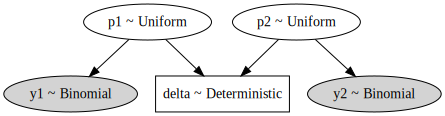

In [4]:
# pymc3によるモデル化
with pm.Model() as model:
    p1 = pm.Uniform('p1', lower=0.0, upper=1.0)
    y1 = pm.Binomial('y1', n=n, p=p1, observed=h1)
    
    p2 = pm.Uniform('p2', lower=0.0, upper=1.0)
    y2 = pm.Binomial('y2', n=n, p=p2, observed=h2)
    # 2枚目のコインと1枚目のコインの差
    delta = pm.Deterministic('delta', p2-p1)

# モデルのグラフィカル表示（3.5から追加された機能）
pm.model_to_graphviz(model)

In [5]:
# MCMCの実行
with model:
    trace = pm.sample(2000, tune=500, step=pm.NUTS())

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p2, p1]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:16<00:00, 308.65draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c402147b8>,
      dtype=object)

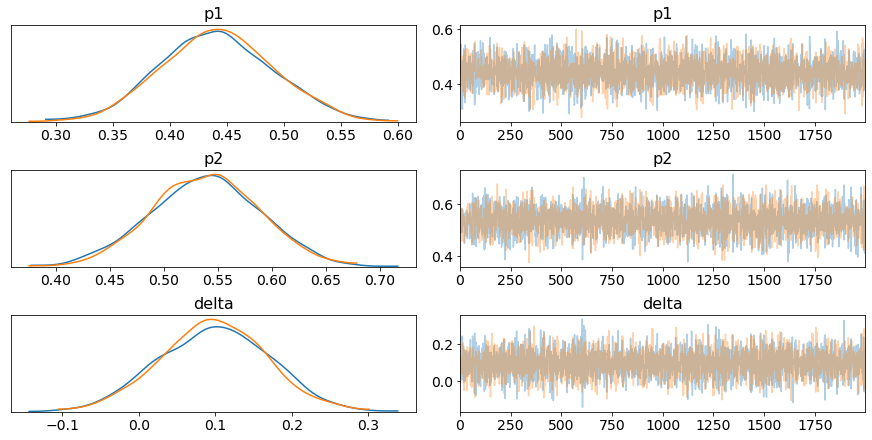

In [6]:
# 収束チェック
pm.traceplot(trace)

In [7]:
# 結果の出力
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p1,0.440951,0.048922,0.000699,0.352424,0.541633,4301.415438,1.000096
p2,0.538315,0.049709,0.000740,0.441102,0.634141,4098.503271,0.999789
delta,0.097364,0.069937,0.000898,-0.042576,0.228632,4361.874926,0.999823


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c3a93e828>,
      dtype=object)

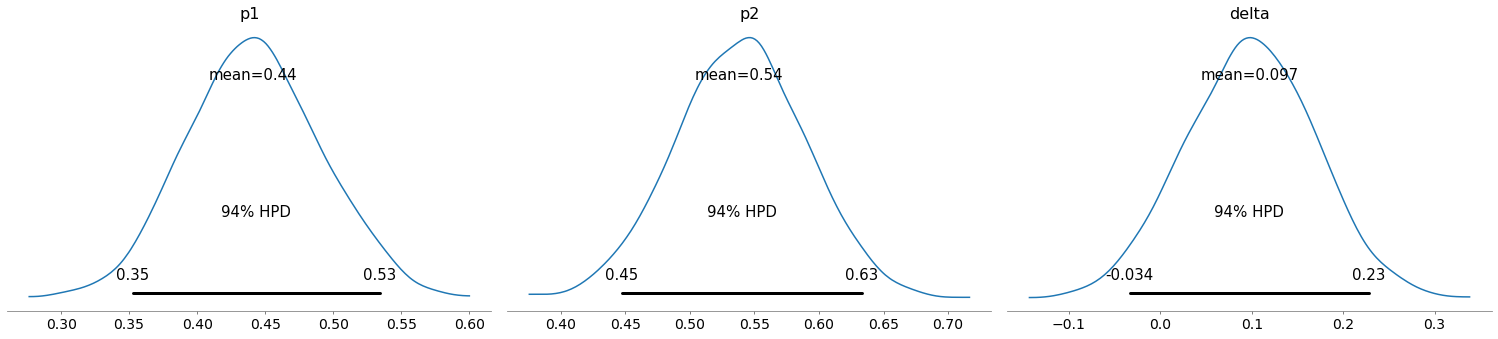

In [8]:
# 事後分布の表示
pm.plot_posterior(trace)

In [9]:
# delta>0の確率は？
sum(trace['delta'] > 0)/len(trace['delta'])

0.9165